In [1]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer, plot_learning_curves
from audiointerp.processing.spectrogram import LogSTFTSpectrogram, plot_spec
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torch
from IPython.display import Audio

In [2]:
root_dir = "/root/ESC50"
# root_dir = "/home/yuliya/ESC50"
sr = 16000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [3]:
n_fft = 512
hop_length = 256
win_length = 512
top_db = None

In [4]:
feature_extractor = LogSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [5]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(10),
    T_audio.TimeMasking(20)
)

In [6]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak", feature_extractor=feature_extractor, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, normalize="peak", feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, normalize="peak", feature_extractor=feature_extractor)

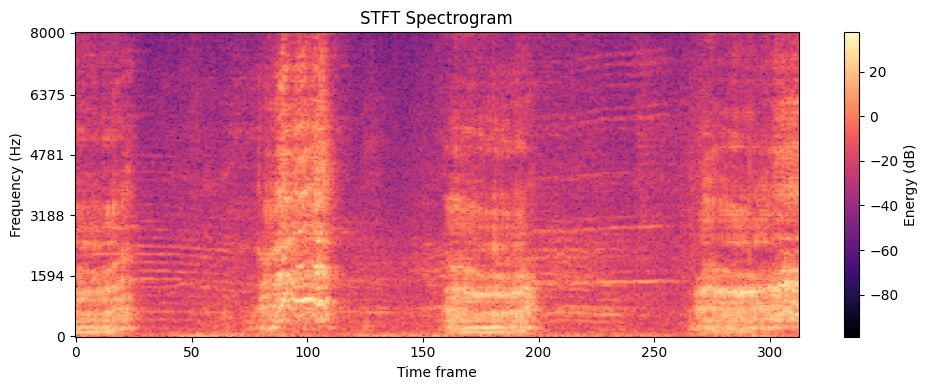

In [7]:
plot_spec(test_data[0][0], sample_rate=sr, is_mel=False)

In [8]:
train_loader_kwargs = {"batch_size": 32, "shuffle": True}
valid_loader_kwargs = {"batch_size": 32, "shuffle": False}
test_loader_kwargs = {"batch_size": 32, "shuffle": False}

In [9]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1")
model_cls = TransferCnn14
model_kwargs = {"num_classes": 50, "num_bins": 257}
model_pretrain_weights_path = "weights/Cnn14_mAP=0.431.pth"

optimizer_cls = optim.Adam
optimizer_kwargs = {"lr": 1e-4}

criterion_cls = nn.CrossEntropyLoss
use_mixup = False
mixup_alpha = 0.0

In [10]:
model_trainer = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs,
    use_mixup=use_mixup,
    mixup_alpha=mixup_alpha
)

Random seed set to: 42


In [11]:
train_losses, train_accs, val_losses, val_accs, test_loss, test_acc = model_trainer.train(num_epochs=20, save_weights_path="logstft_cnn14.pth")

Epoch:   5%|███▊                                                                         | 1/20 [00:28<09:04, 28.64s/it]

Train Loss: 3.8991, Train Acc: 0.0258
Valid Loss: 3.8323, Valid Acc: 0.0500


Epoch:  10%|███████▋                                                                     | 2/20 [00:56<08:30, 28.34s/it]

Train Loss: 3.6941, Train Acc: 0.1042
Valid Loss: 3.3804, Valid Acc: 0.2500


Epoch:  15%|███████████▌                                                                 | 3/20 [01:24<08:00, 28.28s/it]

Train Loss: 3.0310, Train Acc: 0.2042
Valid Loss: 2.4168, Valid Acc: 0.4400


Epoch:  20%|███████████████▍                                                             | 4/20 [01:53<07:31, 28.25s/it]

Train Loss: 2.3202, Train Acc: 0.3517
Valid Loss: 1.8692, Valid Acc: 0.5750


Epoch:  25%|███████████████████▎                                                         | 5/20 [02:21<07:03, 28.24s/it]

Train Loss: 1.8862, Train Acc: 0.4517
Valid Loss: 1.4943, Valid Acc: 0.6225


Epoch:  30%|███████████████████████                                                      | 6/20 [02:49<06:35, 28.23s/it]

Train Loss: 1.5689, Train Acc: 0.5358
Valid Loss: 1.2952, Valid Acc: 0.6650


Epoch:  35%|██████████████████████████▉                                                  | 7/20 [03:17<06:06, 28.23s/it]

Train Loss: 1.2732, Train Acc: 0.6083
Valid Loss: 1.1635, Valid Acc: 0.6800


Epoch:  40%|██████████████████████████████▊                                              | 8/20 [03:46<05:38, 28.25s/it]

Train Loss: 1.1423, Train Acc: 0.6517
Valid Loss: 1.0765, Valid Acc: 0.7125


Epoch:  45%|██████████████████████████████████▋                                          | 9/20 [04:14<05:10, 28.25s/it]

Train Loss: 1.0013, Train Acc: 0.6967
Valid Loss: 1.0303, Valid Acc: 0.7175


Epoch:  50%|██████████████████████████████████████                                      | 10/20 [04:42<04:43, 28.30s/it]

Train Loss: 0.8698, Train Acc: 0.7383
Valid Loss: 0.9339, Valid Acc: 0.7400


Epoch:  55%|█████████████████████████████████████████▊                                  | 11/20 [05:11<04:14, 28.33s/it]

Train Loss: 0.8147, Train Acc: 0.7642
Valid Loss: 0.9139, Valid Acc: 0.7350


Epoch:  60%|█████████████████████████████████████████████▌                              | 12/20 [05:39<03:46, 28.34s/it]

Train Loss: 0.7552, Train Acc: 0.7808
Valid Loss: 0.8593, Valid Acc: 0.7675


Epoch:  65%|█████████████████████████████████████████████████▍                          | 13/20 [06:07<03:18, 28.35s/it]

Train Loss: 0.6399, Train Acc: 0.8033
Valid Loss: 0.8218, Valid Acc: 0.7750


Epoch:  70%|█████████████████████████████████████████████████████▏                      | 14/20 [06:36<02:50, 28.37s/it]

Train Loss: 0.5691, Train Acc: 0.8242
Valid Loss: 0.8519, Valid Acc: 0.7675


Epoch:  75%|█████████████████████████████████████████████████████████                   | 15/20 [07:04<02:21, 28.38s/it]

Train Loss: 0.5044, Train Acc: 0.8425
Valid Loss: 0.8162, Valid Acc: 0.7450


Epoch:  80%|████████████████████████████████████████████████████████████▊               | 16/20 [07:33<01:53, 28.38s/it]

Train Loss: 0.4695, Train Acc: 0.8492
Valid Loss: 0.7814, Valid Acc: 0.7850


Epoch:  85%|████████████████████████████████████████████████████████████████▌           | 17/20 [08:01<01:25, 28.39s/it]

Train Loss: 0.4256, Train Acc: 0.8708
Valid Loss: 0.7809, Valid Acc: 0.7950


Epoch:  90%|████████████████████████████████████████████████████████████████████▍       | 18/20 [08:29<00:56, 28.39s/it]

Train Loss: 0.4110, Train Acc: 0.8742
Valid Loss: 0.8010, Valid Acc: 0.7875


Epoch:  95%|████████████████████████████████████████████████████████████████████████▏   | 19/20 [08:58<00:28, 28.39s/it]

Train Loss: 0.4024, Train Acc: 0.8850
Valid Loss: 0.8526, Valid Acc: 0.7725


Epoch: 100%|████████████████████████████████████████████████████████████████████████████| 20/20 [09:26<00:00, 28.34s/it]


Train Loss: 0.3979, Train Acc: 0.8758
Valid Loss: 0.7739, Valid Acc: 0.7950
Best val Acc: 0.7950
Модель сохранена в logstft_cnn14.pth
Test Loss: 0.8443, Test Acc: 0.7800


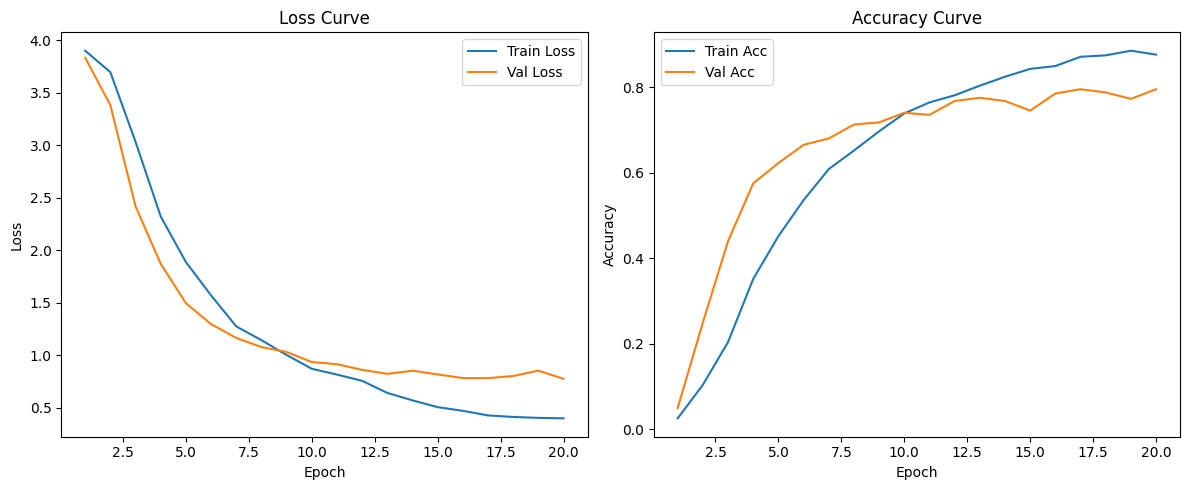

In [12]:
plot_learning_curves(train_losses=train_losses, train_accs=train_accs, val_losses=val_losses, val_accs=val_accs)

In [13]:
model_trainer.model.load_state_dict(torch.load("logstft_cnn14.pth"))

<All keys matched successfully>

In [14]:
model_trainer.test()

Test Loss: 0.8443, Test Acc: 0.7800


(0.8443098521232605, 0.78)